In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [ ]:
Ravdess = "/content/drive/MyDrive/DL Project/Audio_Song_Actors_01-24/"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

emotion_detected = []
file_path = []
for i in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + i)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        emotion_detected.append(int(part[2]))
        file_path.append(Ravdess + i + '/' + file)
        

emotion_df = pd.DataFrame(emotion_detected, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
ravdess_df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
1,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
2,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
3,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
4,calm,/content/drive/MyDrive/DL Project/Audio_Song_A...


In [ ]:
data_path = pd.concat([ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


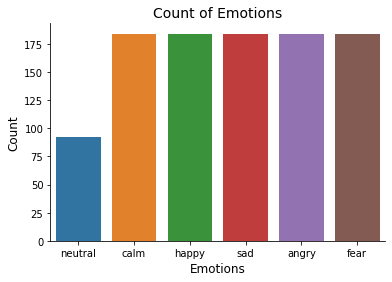

In [ ]:
plt.title('Count of Emotions', size=14)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def audio_waveplot(data, sr, emo):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(emo), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def audio_spectrogram(data, sr, emo):
    x = librosa.stft(data)
    x_db = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(emo), size=15)
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

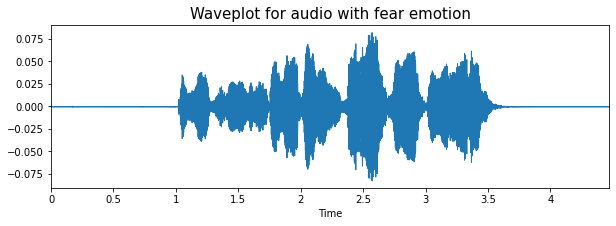

<Figure size 432x288 with 0 Axes>

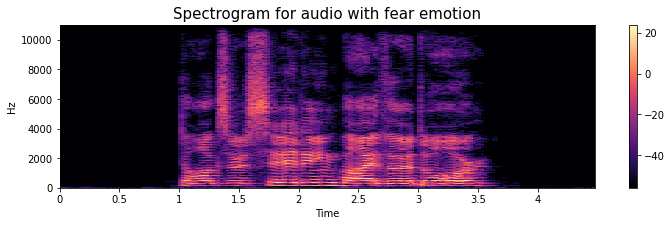

In [ ]:
emotion ='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
audio_waveplot(data, sampling_rate, emotion)
plt.tight_layout()
audio_spectrogram(data, sampling_rate, emotion)

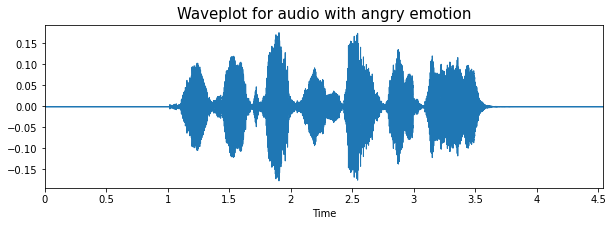

<Figure size 432x288 with 0 Axes>

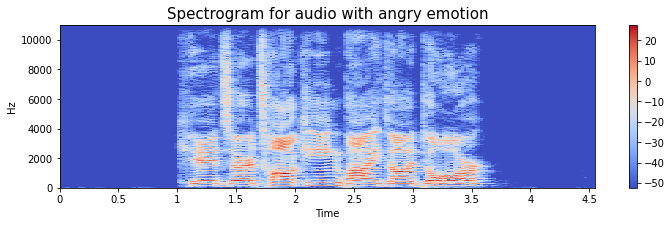

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
audio_waveplot(data, sampling_rate, emotion)
plt.tight_layout()
audio_spectrogram(data, sampling_rate, emotion)

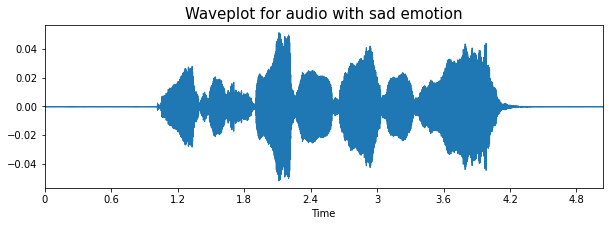

<Figure size 432x288 with 0 Axes>

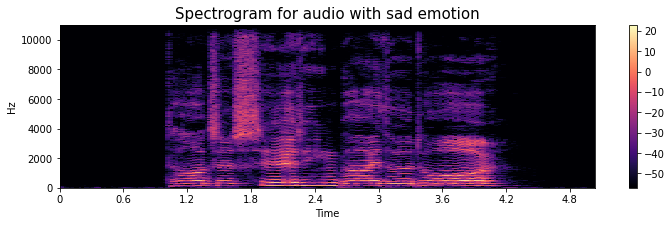

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
audio_waveplot(data, sampling_rate, emotion)
plt.tight_layout()
audio_spectrogram(data, sampling_rate, emotion)

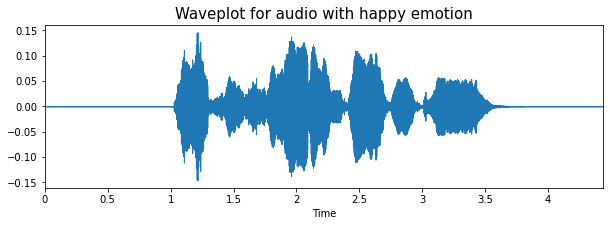

<Figure size 432x288 with 0 Axes>

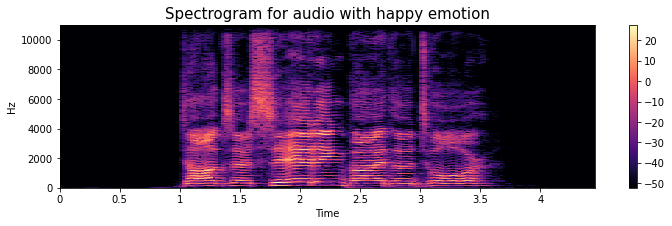

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
audio_waveplot(data, sampling_rate, emotion)
plt.tight_layout()
audio_spectrogram(data, sampling_rate, emotion)

In [ ]:
def noise(data):
    noise_amp = 0.05*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.5):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.5):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

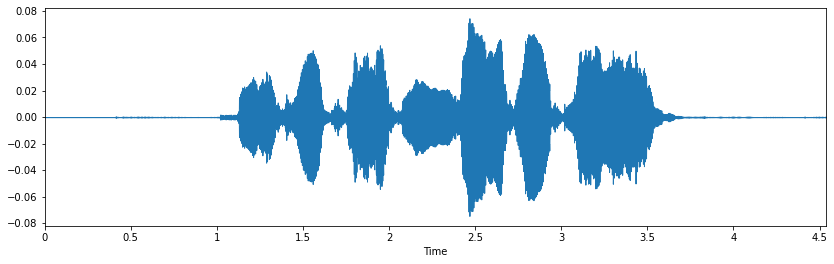

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)

Injecting Noise

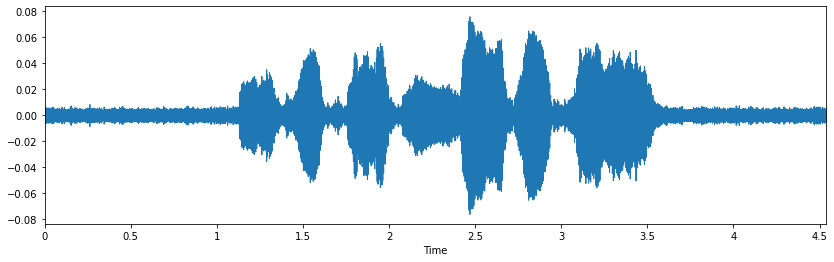

In [ ]:
waveplot = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=waveplot, sr=sample_rate)

Stretching

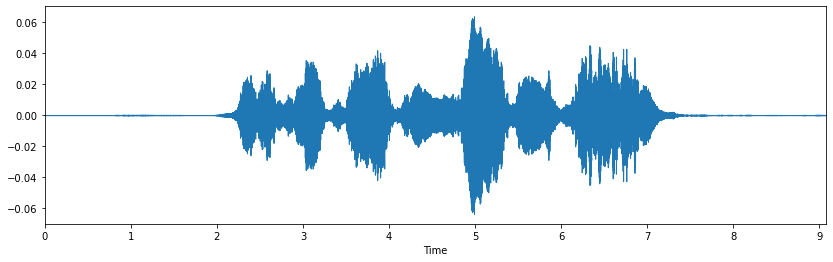

In [ ]:
waveplot = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=waveplot, sr=sample_rate)

Shifting

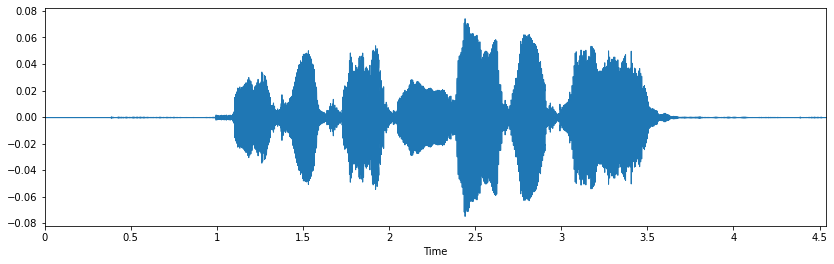

In [ ]:
waveplot = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=waveplot, sr=sample_rate)

Pitch

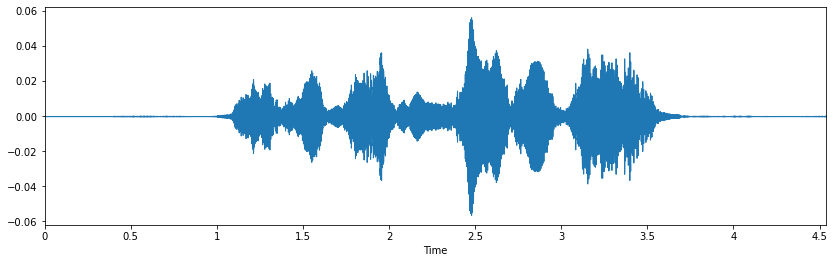

In [ ]:
waveplot = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=waveplot, sr=sample_rate)